In [8]:
import os
import sys
while not os.getcwd().endswith('ml'):
    os.chdir('..')
sys.path.insert(0, os.getcwd())

In [9]:
import tensorflow as tf
import random
from autoencoder.vanila_autoencoder import VanilaDeepAutoEncoder, VanilaAutoEncoder, CNNAutoEncoder
from helpers.common_helpers import *

from helpers.image_helpers import display_images
import matplotlib.pyplot as plt
import numpy as np

In [10]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()        

In [11]:
x_train = x_train.astype(np.float32)[:, :, :, np.newaxis]
x_train = x_train / 255.

x_test = x_test.astype(np.float32)[:, :, :, np.newaxis]
x_test = x_test / 255.

In [12]:
print(x_train.shape, x_train.dtype)

(60000, 28, 28, 1) float32


In [16]:
def train_autoencoder(AutoEncoder, hidden_size=50, epochs=30, verbose=1):
    autoencoder = AutoEncoder(input_shape=x_train[0].shape, hidden_size=hidden_size)
    autoencoder.compile(
        loss='mse', 
        optimizer='Adam', 
        metrics=['mse', 'msle']
    )
    
    history = autoencoder.fit(
        x=x_train, 
        y=x_train,
        validation_data=(x_test, x_test),
        batch_size=128,
        epochs=epochs,
        verbose=verbose
    )
    return history, autoencoder

Training <class 'autoencoder.vanila_autoencoder.VanilaDeepAutoEncoder'>
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0387 - mse: 0.0387 - msle: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172 - val_msle: 0.0085
Epoch 2/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0143 - mse: 0.0143 - msle: 0.0071 - val_loss: 0.0115 - val_mse: 0.0115 - val_msle: 0.0057
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0107 - mse: 0.0107 - msle: 0.0052 - val_loss: 0.0095 - val_mse: 0.0095 - val_msle: 0.0046
Epoch 4/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0092 - mse: 0.0092 - msle: 0.0044 - val_loss: 0.0083 - val_mse: 0.0083 - val_msle: 0.0040
Epoch 5/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0083 - mse: 0.0083 - msle: 0.0040 - val_loss: 0.0076 - val_mse: 0.0076 - val_msle: 0.0037
Epoch 6/20
60

Epoch 6/20
60000/60000 [==============================] - 32s 537us/sample - loss: 0.0094 - mse: 0.0094 - msle: 0.0045 - val_loss: 0.0090 - val_mse: 0.0090 - val_msle: 0.0043
Epoch 7/20
60000/60000 [==============================] - 32s 536us/sample - loss: 0.0090 - mse: 0.0090 - msle: 0.0043 - val_loss: 0.0087 - val_mse: 0.0087 - val_msle: 0.0042
Epoch 8/20
60000/60000 [==============================] - 33s 555us/sample - loss: 0.0086 - mse: 0.0086 - msle: 0.0041 - val_loss: 0.0084 - val_mse: 0.0084 - val_msle: 0.0039
Epoch 9/20
60000/60000 [==============================] - 33s 556us/sample - loss: 0.0083 - mse: 0.0083 - msle: 0.0040 - val_loss: 0.0080 - val_mse: 0.0080 - val_msle: 0.0039
Epoch 10/20
60000/60000 [==============================] - 33s 556us/sample - loss: 0.0081 - mse: 0.0081 - msle: 0.0039 - val_loss: 0.0077 - val_mse: 0.0077 - val_msle: 0.0037
Epoch 11/20
60000/60000 [==============================] - 34s 563us/sample - loss: 0.0078 - mse: 0.0078 - msle: 0.0038 - va

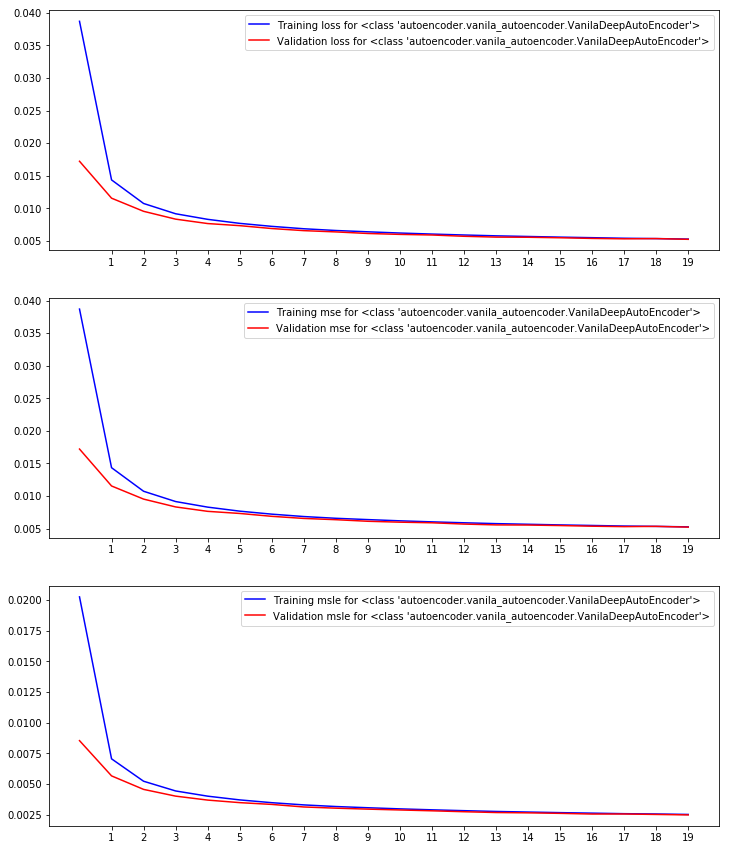

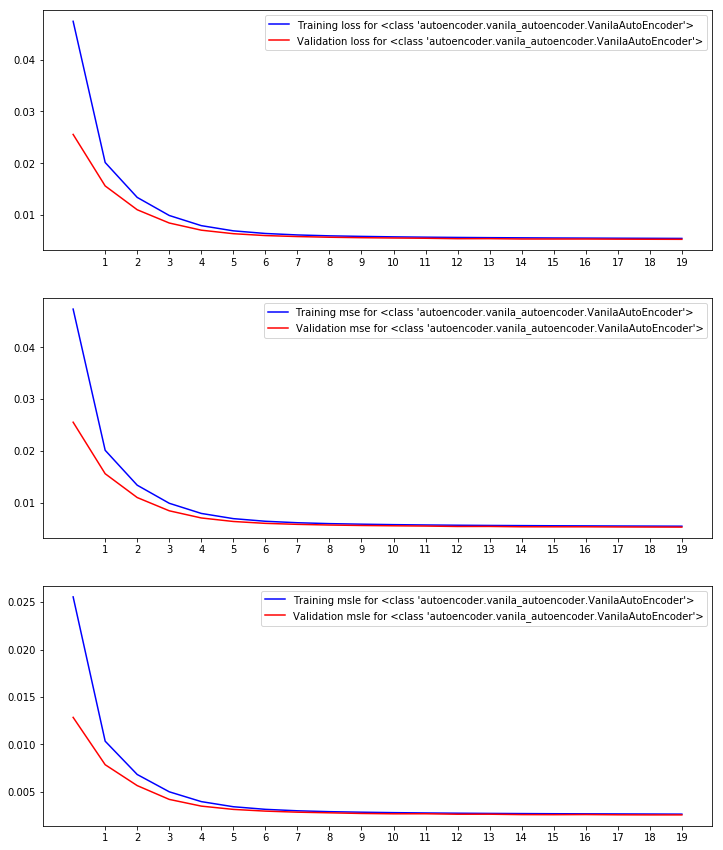

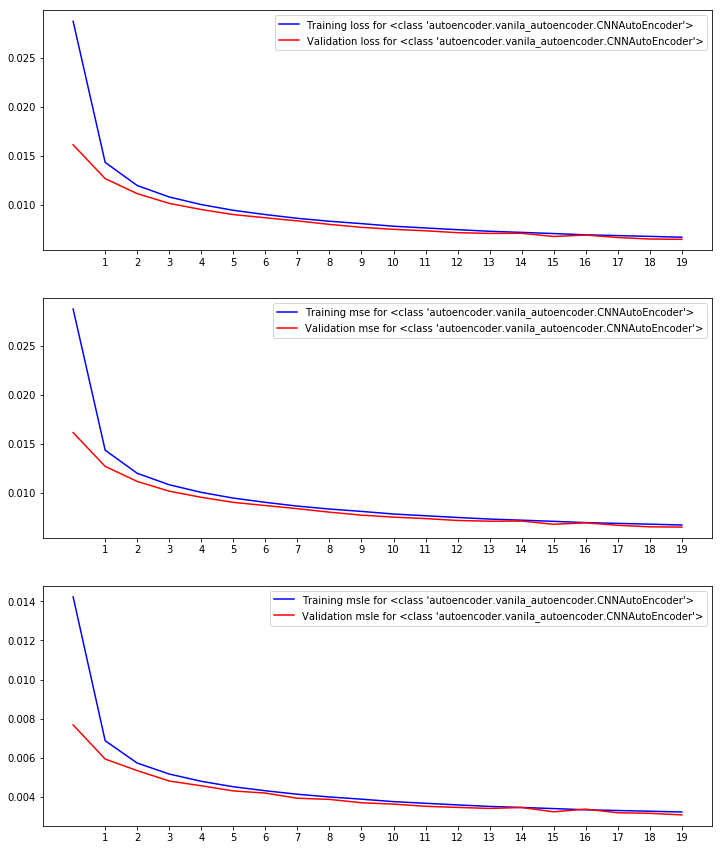

In [14]:
for autoencoder in [VanilaDeepAutoEncoder, VanilaAutoEncoder, CNNAutoEncoder]:
    print("Training {}".format(autoencoder))
    history, _ = train_autoencoder(AutoEncoder=autoencoder, epochs=20, verbose=1)
    print("-" * 10)
    display_history_metrics(history, autoencoder)

In [39]:
_, model = train_autoencoder(VanilaAutoEncoder, epochs=10, verbose=0)

In [48]:
in_samples = x_test[np.random.randint(x_test.shape[0], size=10)]

In [49]:
out_samples = model.predict(in_samples)

#### Входные изображения

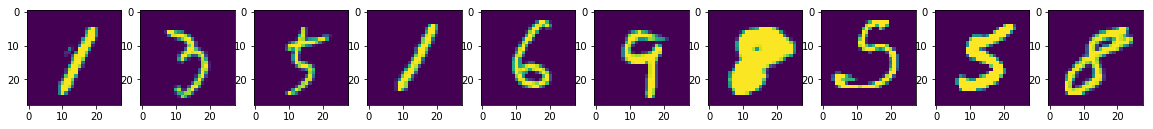

In [50]:
display_images(in_samples, 10)

#### Выходные изображения

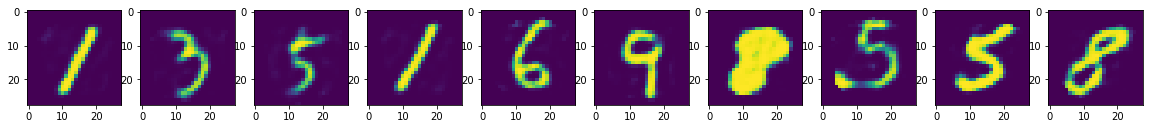

In [51]:
display_images(out_samples, 10)